In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [81]:
case = "IEEE118_mod1"
nbc = 40

In [82]:
Folder_JB = 'J.Full_year_operational_cost/Results/B.Operation_cost'
Folder_JD = 'J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand'
Folder_JE = 'J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_JK = 'J.Full_year_operational_cost/Results/K.Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour'

# Folder_JB = 'J.Full_year_operational_cost/Results/B'
# Folder_JD = 'J.Full_year_operational_cost/Results/D'
# Folder_JE = 'J.Full_year_operational_cost/Results/E'
# Folder_JK = 'J.Full_year_operational_cost/Results/K'
# Folder_JL = 'J.Full_year_operational_cost/Results/L'

Folder_B = "B.Operation_cost"
DirName  = os.getcwd()
category_dict = {
                 Folder_B: "OC_",
                 Folder_JB: "OC",
                 Folder_JD: "RD",
                 Folder_JE: "LB",
                 Folder_JK: "DHI",
                 Folder_JL: "CHI"
                }

## Cost and cost components

In [92]:
def LoadingData(dir, folder,result, case, ncluster, cm):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join( folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        #df = pd.read_csv(os.path.join( folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])
        df = pd.read_csv(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv",index_col=[0,1])
    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Case'] = case
    df['Clustering method'] = cm
    df['Number of clusters'] = ncluster
    df = df.reset_index()
    if result == "CostSummary":
        df["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
    print(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv")
    return df

In [93]:
df_all = pd.DataFrame()

folders = [Folder_JB,Folder_JD,Folder_JE,Folder_JK,Folder_JL]
for folder in folders: 
    df = LoadingData(DirName,folder,"CostSummary",case,nbc,category_dict[folder])
    df_all = pd.concat([df_all,df])

#df_cost_bm = pd.read_csv(f"J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_ByStages_nc400/3.Out/oT_Result_CostSummary_IEEE118_mod1_ByStages_nc400.csv")

#df_cost_bm = pd.read_csv(f"A.The_full_year_MILP/RTS24_mod1/3.Out/oT_Result_CostSummary_RTS24_mod1.csv")

if case == "IEEE118_mod1": 
    df_cost_bm = pd.read_csv(f"J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_ByStages_nc120/3.Out/oT_Result_CostSummary_IEEE118_mod1_ByStages_nc120.csv")
else:
    df_cost_bm = pd.read_csv(f"A.The_full_year_MILP/{case}/3.Out/oT_Result_CostSummary_{case}.csv")


df_cost_bm['CaseName'] = "Benchmark"
df_cost_bm['Case'] = case
df_cost_bm['Clustering method'] = "Benchmark"
df_cost_bm['Number of clusters'] = 120
df_cost_bm["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
df_all = pd.concat([df_all,df_cost_bm])
#df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR")

J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc40.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc40.csv
J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc40.csv
J.Full_year_operational_cost/Results/K.Investments_per_hour/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc40.csv
J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_CostSummary_IEEE118_mod1_Bystages_nc40.csv


In [94]:
df_pivot = df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR").drop(["TotalSystemCost","ConsumptionOperationCost","GenerationInvestmentCost"],axis = 1)
df_pivot_sys_cost = df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR")["TotalSystemCost"]

In [95]:
(df_pivot_sys_cost/df_pivot_sys_cost.loc["Benchmark"]-1)*100

Clustering method
Benchmark    0.000000
CHI          4.046182
DHI          0.029336
LB           5.860332
OC           0.422828
RD           5.166869
Name: TotalSystemCost, dtype: float64

In [96]:
(df_pivot/df_pivot.loc["Benchmark"]-1)*100

Cost/Payment,EmissionCost,GenerationOperationCost,NetworkInvestmentCost,ReliabilityCost
Clustering method,,,,
Benchmark,0.000000,0.000000,0.000000,0.000000
CHI,9.918971,9.140402,-25.477707,1173.611920
DHI,0.461592,0.580853,-2.547771,47.081608
LB,13.099671,13.722263,-34.394904,1183.589688
OC,-0.725171,-0.851403,6.369427,-1.823572
RD,10.457351,10.074163,-19.108280,-100.000000


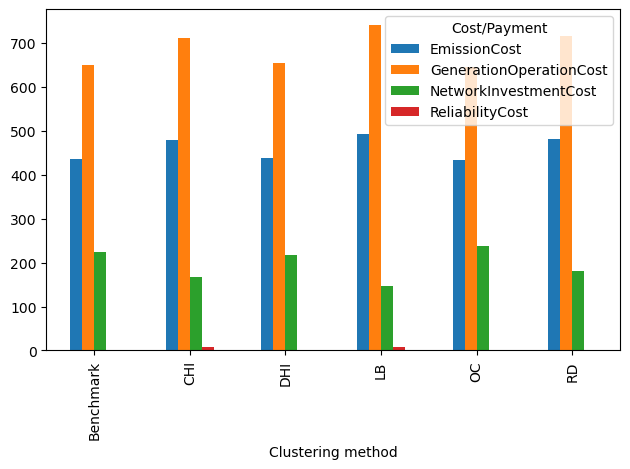

In [97]:
import matplotlib.pyplot as plt
df_pivot.plot(kind = "bar",stacked = False,legend = True)
plt.tight_layout()
plt.savefig(f"Z.Figures/InDepth/CostComponents_{case}_{nbc}.png")

## Investment decisions 

In [98]:
df_all_inv = pd.DataFrame()

folders = [Folder_JB,Folder_JD,Folder_JE,Folder_JK,Folder_JL]
#folders = [Folder_B,Folder_JB,Folder_JD]

for folder in folders: 
    df = LoadingData(DirName,folder,"NetworkInvestment",case,nbc,category_dict[folder])
    df_all_inv = pd.concat([df_all_inv,df])


J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc40.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc40.csv
J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc40.csv
J.Full_year_operational_cost/Results/K.Investments_per_hour/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc40.csv
J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_Bystages_nc40/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc40.csv


<Axes: xlabel='Nodes'>

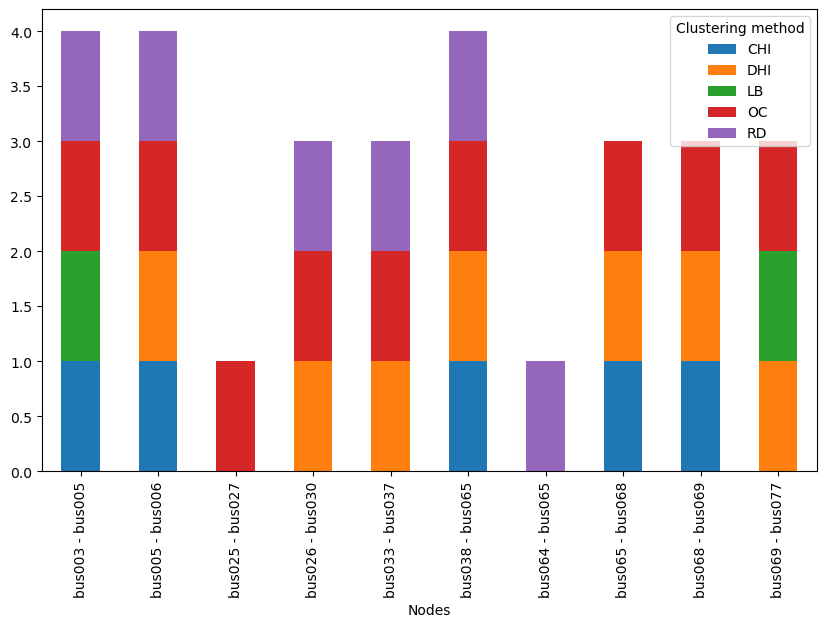

In [99]:
# Combine 'InitialNode' and 'FinalNode' into a single column
df_all_inv['Nodes'] = df_all_inv['InitialNode'].astype(str) + " - " + df_all_inv['FinalNode'].astype(str)

# Pivot the DataFrame to reshape it for stacking
#Filter out lines with no investment
df_all_inv_f = df_all_inv["p.u."] == 1

#Pivot 
df_pivot = df_all_inv[df_all_inv_f].pivot_table(index='Nodes', columns='Clustering method', values='p.u.', aggfunc='sum')
#df_pivot = df_all_inv.pivot_table(index='Clustering method', columns='Nodes', values='p.u.', aggfunc='sum')

#Filter out lines where all of them invest in 
df_pivot  = df_pivot[~(df_pivot == 1).all(axis=1)]


# Plot stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))


## Duration curves

In [103]:
import predictor_of_investment_helper_methods as hm

### Line utilization

In [115]:
df_utils_FY.pivot(values = "GWh",index = "LoadLevel",columns = ["InitialNode","FinalNode"]).sum(axis=1)

LoadLevel
01-01 00:00:00+01:00    36.360588
01-01 01:00:00+01:00    35.250501
01-01 02:00:00+01:00    33.260638
01-01 03:00:00+01:00    31.332457
01-01 04:00:00+01:00    30.035038
                          ...    
12-30 19:00:00+01:00    43.629285
12-30 20:00:00+01:00    40.979599
12-30 21:00:00+01:00    38.863618
12-30 22:00:00+01:00    41.492784
12-30 23:00:00+01:00    37.906122
Length: 8736, dtype: float64

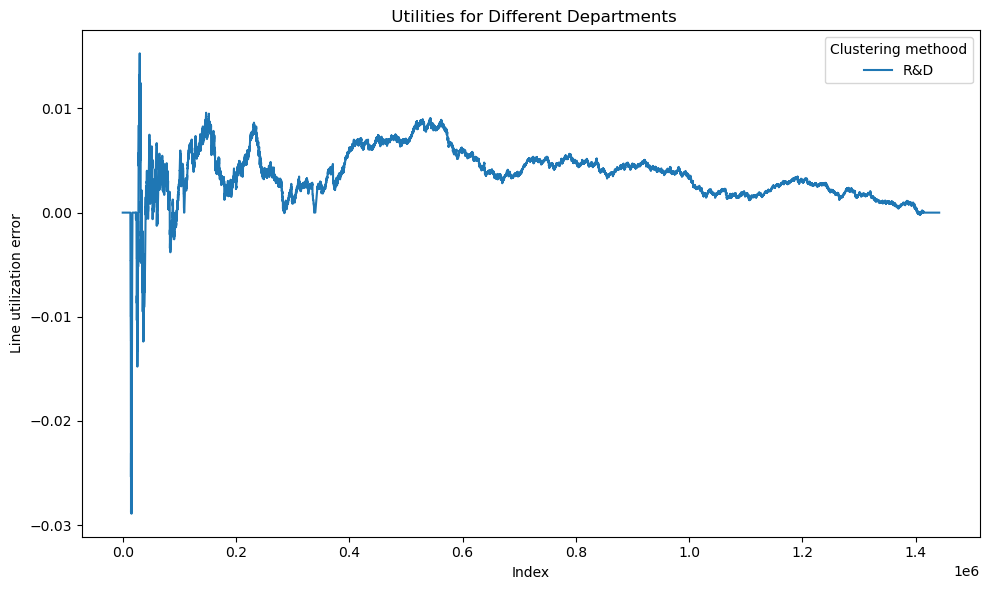

In [108]:
df_utils_FY = hm.get_utils_FYWOI(case)
np_all_util_FY = df_utils_FY.GWh.to_numpy().flatten()
sorted_util_FY = -np.sort(-np_all_util_FY)


cms = ["R&D"]#, "OPT_LB","CHI"]


# Create a new figure
plt.figure(figsize=(10, 6))

# Loop through each department, get the data, and plot it
df_util_dev = pd.DataFrame(columns =["cm","dev","dev_f"])
for cm in cms:
    # Get the data for each department and case
    df_utils = hm.get_utils_cm(cm, 40, case)
    np_all_util = df_utils.to_numpy().flatten()
    
    # Sort in descending order
    sorted_util = -np.sort(-np_all_util) - sorted_util_FY
    
    # Plot the sorted data
    plt.plot(sorted_util, label=cm)
    
    #Calculate deviation with fy
    

# Add the full year 

#plt.plot(sorted_util_FY[:end_], label="Full year")

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Line utilization error')
plt.title(' Utilities for Different Departments')
plt.legend(title="Clustering methood")
plt.tight_layout()

# Show the plot
plt.show()

In [110]:
df_curts

,Period,Scenario,LoadLevel,Unit,MW
0,2030,sc01,01-01 00:00:00+01:00,Solar 43,0.000000
1,2030,sc01,01-01 00:00:00+01:00,Wind 13,0.000000
2,2030,sc01,01-01 00:00:00+01:00,Wind 02,0.000000
3,2030,sc01,01-01 00:00:00+01:00,Solar 56,0.000000
4,2030,sc01,01-01 00:00:00+01:00,Solar 17,0.000000
...,...,...,...,...,...
978427,2030,sc01,12-30 23:00:00+01:00,Hydro 27,0.000000
978428,2030,sc01,12-30 23:00:00+01:00,Wind N02,358.536585
978429,2030,sc01,12-30 23:00:00+01:00,Geo 01,16.000000
978430,2030,sc01,12-30 23:00:00+01:00,Wind N07,0.000000


-170.00248662097957
225.53576273423562
112.69204987128772


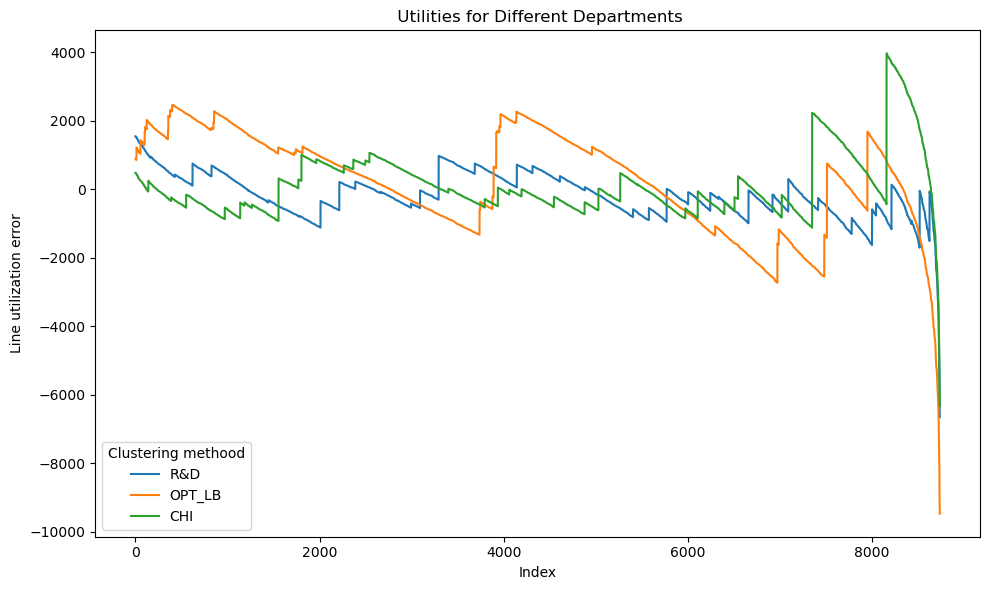

In [127]:
curts_FYMILP = hm.get_curts_FYWOI(case).pivot(values = "MW",index = "LoadLevel",columns = "Unit").sum(axis = 1)
curts_FYMILP_sorted = np.sort(curts_FYMILP.to_numpy())
cms = ["R&D", "OPT_LB","CHI"]


# Create a new figure
plt.figure(figsize=(10, 6))

# Loop through each department, get the data, and plot it
df_util_dev = pd.DataFrame(columns =["cm","dev","dev_f"])
for cm in cms:
    
    # Get the data for each clustering method
    curts_cm = hm.get_curts_cm(cm,nbc,case).sum(axis = 1)
    curts_cm_sorted = np.sort(curts_cm.to_numpy())


    
    # Plot the sorted data
    plt.plot(curts_cm_sorted-curts_FYMILP_sorted, label=cm)
    print(np.mean((curts_cm-curts_FYMILP)))
    
    #Calculate deviation with fy
    

# Add the full year 

#plt.plot(sorted_util_FY[:end_], label="Full year")

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Line utilization error')
plt.title(' Utilities for Different Departments')
plt.legend(title="Clustering methood")
plt.tight_layout()

# Show the plot
plt.show()